In [1]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
import matplotlib.pyplot as plt
from sklearn import model_selection
import sklearn
import seaborn as sns
import pickle

In [ ]:
# data_ar = pd.read_csv("/content/drive/Shareddrives/Proyecto Final/Progra/final_data_ARREGLADA.csv")

In [3]:
data = pd.read_csv(r"G:\Shared drives\Proyecto Final\Progra\neuropy_data.csv")

In [4]:
# full_data = pd.concat([data,data_ar], axis=0)
full_data = data

In [5]:
full_data

,Unnamed: 0,raw_data,ecg_signals,info,hrv_time,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,...,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,ECG_R_Peaks,mean_quality,age,female,male,arrythmia
0,100,<wfdb.io.record.Record object at 0x7f3f9b1f6a10>,ECG_Raw ECG_Clean ECG_Rate ECG_Qual...,"{'ECG_R_Peaks': array([ 236, 527, 809, 1103,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,805.555556,29.212926,28.067929,29.515114,0.036264,...,12,11,11,12,12,0.617106,69.0,0,1,1
1,1000,<wfdb.io.record.Record object at 0x7f3f9b23b220>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': array([ 383, 691, 990, 1280,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,806.060606,89.043426,142.101728,149.127550,0.110467,...,12,11,11,11,12,0.673991,69.0,0,1,1
2,101,<wfdb.io.record.Record object at 0x7f3f9b257670>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': array([ 311, 686, 1054, 1422,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,992.592593,50.288519,67.471988,70.425608,0.050664,...,10,9,9,9,10,0.643327,75.0,1,0,1
3,1011,<wfdb.io.record.Record object at 0x7f3f9f52d3c0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': array([ 385, 753, 1103, 1457,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDN...,1015.277778,27.297434,28.560404,30.801082,0.026887,...,9,8,8,9,9,0.413333,75.0,1,0,1
4,102,<wfdb.io.record.Record object at 0x7f3f9b1f43a0>,ECG_Raw ECG_Clean ECG_Rate ECG_Qual...,"{'ECG_R_Peaks': array([ 272, 549, 825, 1108,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,791.414141,27.818152,24.767437,25.973831,0.035150,...,5,9,11,8,12,0.668521,84.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,patient267,<wfdb.io.record.Record object at 0x7f3f9b222e90>,ECG_Raw ECG_Clean ECG_Rate ECG_Qual...,"{'ECG_R_Peaks': array([ 690, 1015, 1403, 1792,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDN...,534.941176,230.829339,448.150714,462.848063,0.431504,...,8,14,18,12,19,0.659709,67.0,1,0,0
95,patient276,<wfdb.io.record.Record object at 0x7f3f9b223af0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': array([ 433, 1241, 2058, 2878,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDNN...,786.083333,23.302198,16.887327,17.637254,0.029643,...,13,12,12,12,13,0.532063,NaN,0,1,0
96,patient277,<wfdb.io.record.Record object at 0x7f3f9b2234f0>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': array([1134, 2309, 3511, 4713,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SDN...,1215.714286,53.368887,72.005787,78.486729,0.043899,...,8,7,7,8,8,0.617563,NaN,0,1,0
97,patient279,<wfdb.io.record.Record object at 0x7f3fd353ff70>,ECG_Raw ECG_Clean ECG_Rate ECG_Quali...,"{'ECG_R_Peaks': array([ 891, 2214, 3570, 4935,...",HRV_MeanNN HRV_SDNN HRV_SDANN1 HRV_SD...,1269.857143,179.590672,211.833268,216.742858,0.141426,...,8,7,7,8,8,0.648553,35.0,1,0,0


In [6]:
full_data.drop(columns = ["Unnamed: 0", "raw_data"], inplace = True)

In [7]:
full_data['age'].isna().sum()

5

In [8]:
full_data.dropna(inplace = True)

In [9]:
data_ml = full_data.drop(columns = ["ecg_signals", "info", "hrv_time", "female", "male"])
data_ml = data_ml[data_ml["mean_quality"]>0.5]
data_ml

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,HRV_HTI,HRV_TINN,ECG_P_Peaks,ECG_Q_Peaks,ECG_S_Peaks,ECG_T_Peaks,ECG_R_Peaks,mean_quality,age,arrythmia
0,805.555556,29.212926,28.067929,29.515114,0.036264,0.034843,797.222222,24.710000,0.030995,41.666667,...,5.500000,62.5000,12,11,11,12,12,0.617106,69.0,1
1,806.060606,89.043426,142.101728,149.127550,0.110467,0.176292,802.777778,32.946667,0.041041,50.000000,...,5.500000,179.6875,12,11,11,11,12,0.673991,69.0,1
2,992.592593,50.288519,67.471988,70.425608,0.050664,0.067976,977.777778,65.893333,0.067391,69.444444,...,4.500000,93.7500,10,9,9,9,10,0.643327,75.0,1
4,791.414141,27.818152,24.767437,25.973831,0.035150,0.031295,788.888889,32.946667,0.041763,45.833333,...,3.666667,23.4375,5,9,11,8,12,0.668521,84.0,1
6,765.909091,44.584690,25.061652,24.914119,0.058211,0.032721,752.777778,32.946667,0.043767,62.500000,...,5.500000,31.2500,12,11,11,12,12,0.625069,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,753.545455,26.759535,18.934096,19.857548,0.035512,0.025127,762.000000,28.169400,0.036968,41.000000,...,3.666667,62.5000,12,11,11,12,12,0.649118,37.0,0
93,827.181818,7.040145,8.390471,8.638415,0.008511,0.010143,827.000000,5.930400,0.007171,9.000000,...,2.750000,0.0000,12,11,11,12,12,0.549114,68.0,0
94,534.941176,230.829339,448.150714,462.848063,0.431504,0.837757,326.000000,4.447800,0.013644,445.000000,...,1.888889,0.0000,8,14,18,12,19,0.659709,67.0,0
97,1269.857143,179.590672,211.833268,216.742858,0.141426,0.166817,1323.000000,56.338800,0.042584,60.500000,...,7.000000,0.0000,8,7,7,8,8,0.648553,35.0,0


In [10]:
data_ml["ratio p/r peaks"] = data_ml["ECG_P_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio q/r peaks"] = data_ml["ECG_Q_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio s/r peaks"] = data_ml["ECG_S_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml["ratio t/r peaks"] = data_ml["ECG_T_Peaks"].div(data_ml["ECG_R_Peaks"])
data_ml

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,ECG_S_Peaks,ECG_T_Peaks,ECG_R_Peaks,mean_quality,age,arrythmia,ratio p/r peaks,ratio q/r peaks,ratio s/r peaks,ratio t/r peaks
0,805.555556,29.212926,28.067929,29.515114,0.036264,0.034843,797.222222,24.710000,0.030995,41.666667,...,11,12,12,0.617106,69.0,1,1.000000,0.916667,0.916667,1.000000
1,806.060606,89.043426,142.101728,149.127550,0.110467,0.176292,802.777778,32.946667,0.041041,50.000000,...,11,11,12,0.673991,69.0,1,1.000000,0.916667,0.916667,0.916667
2,992.592593,50.288519,67.471988,70.425608,0.050664,0.067976,977.777778,65.893333,0.067391,69.444444,...,9,9,10,0.643327,75.0,1,1.000000,0.900000,0.900000,0.900000
4,791.414141,27.818152,24.767437,25.973831,0.035150,0.031295,788.888889,32.946667,0.041763,45.833333,...,11,8,12,0.668521,84.0,1,0.416667,0.750000,0.916667,0.666667
6,765.909091,44.584690,25.061652,24.914119,0.058211,0.032721,752.777778,32.946667,0.043767,62.500000,...,11,12,12,0.625069,-1.0,1,1.000000,0.916667,0.916667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,753.545455,26.759535,18.934096,19.857548,0.035512,0.025127,762.000000,28.169400,0.036968,41.000000,...,11,12,12,0.649118,37.0,0,1.000000,0.916667,0.916667,1.000000
93,827.181818,7.040145,8.390471,8.638415,0.008511,0.010143,827.000000,5.930400,0.007171,9.000000,...,11,12,12,0.549114,68.0,0,1.000000,0.916667,0.916667,1.000000
94,534.941176,230.829339,448.150714,462.848063,0.431504,0.837757,326.000000,4.447800,0.013644,445.000000,...,18,12,19,0.659709,67.0,0,0.421053,0.736842,0.947368,0.631579
97,1269.857143,179.590672,211.833268,216.742858,0.141426,0.166817,1323.000000,56.338800,0.042584,60.500000,...,7,8,8,0.648553,35.0,0,1.000000,0.875000,0.875000,1.000000


In [11]:
data_ml.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks', 'mean_quality', 'age',
       'arrythmia', 'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks'],
      dtype='object')

<AxesSubplot:>

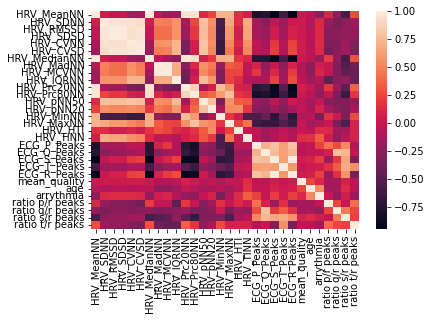

In [12]:
corr = data_ml.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
corr["arrythmia"]

HRV_MeanNN        -0.235541
HRV_SDNN           0.119537
HRV_RMSSD          0.123915
HRV_SDSD           0.123506
HRV_CVNN           0.133313
HRV_CVSD           0.116689
HRV_MedianNN      -0.189195
HRV_MadNN          0.051330
HRV_MCVNN          0.105223
HRV_IQRNN         -0.087038
HRV_Prc20NN       -0.199857
HRV_Prc80NN       -0.229471
HRV_pNN50         -0.014816
HRV_pNN20          0.089299
HRV_MinNN         -0.348430
HRV_MaxNN         -0.087191
HRV_HTI            0.131894
HRV_TINN           0.344454
ECG_P_Peaks        0.236980
ECG_Q_Peaks        0.006668
ECG_S_Peaks        0.211657
ECG_T_Peaks        0.057216
ECG_R_Peaks        0.224611
mean_quality       0.111217
age                0.520115
arrythmia          1.000000
ratio p/r peaks   -0.004705
ratio q/r peaks   -0.219104
ratio s/r peaks    0.053522
ratio t/r peaks   -0.189727
Name: arrythmia, dtype: float64

In [14]:
for i in corr.columns:
  print(corr["arrythmia"][i])
  if i == "arrythmia":
    pass
  elif corr["arrythmia"][i] > 0.6 or corr["arrythmia"][i] < -0.6:
    data_ml.drop(columns = i, inplace = True)
    print(i)
data_ml

-0.23554106882855783
0.11953684222491814
0.12391515188863292
0.12350587695097644
0.1333126744803451
0.11668925478642703
-0.18919457136439852
0.05132964713115611
0.10522338142691973
-0.08703835313348476
-0.19985720344809565
-0.229470711548734
-0.014815614944874732
0.08929928725837635
-0.3484304861227947
-0.08719076876744168
0.1318940804360953
0.3444543159567834
0.23697977937492246
0.006667607089922113
0.2116573511903351
0.05721643253211678
0.22461114098160107
0.11121678445904398
0.5201152462394193
1.0
-0.004705106651441953
-0.21910447661766816
0.05352225807104249
-0.18972693193116907


,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,ECG_S_Peaks,ECG_T_Peaks,ECG_R_Peaks,mean_quality,age,arrythmia,ratio p/r peaks,ratio q/r peaks,ratio s/r peaks,ratio t/r peaks
0,805.555556,29.212926,28.067929,29.515114,0.036264,0.034843,797.222222,24.710000,0.030995,41.666667,...,11,12,12,0.617106,69.0,1,1.000000,0.916667,0.916667,1.000000
1,806.060606,89.043426,142.101728,149.127550,0.110467,0.176292,802.777778,32.946667,0.041041,50.000000,...,11,11,12,0.673991,69.0,1,1.000000,0.916667,0.916667,0.916667
2,992.592593,50.288519,67.471988,70.425608,0.050664,0.067976,977.777778,65.893333,0.067391,69.444444,...,9,9,10,0.643327,75.0,1,1.000000,0.900000,0.900000,0.900000
4,791.414141,27.818152,24.767437,25.973831,0.035150,0.031295,788.888889,32.946667,0.041763,45.833333,...,11,8,12,0.668521,84.0,1,0.416667,0.750000,0.916667,0.666667
6,765.909091,44.584690,25.061652,24.914119,0.058211,0.032721,752.777778,32.946667,0.043767,62.500000,...,11,12,12,0.625069,-1.0,1,1.000000,0.916667,0.916667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,753.545455,26.759535,18.934096,19.857548,0.035512,0.025127,762.000000,28.169400,0.036968,41.000000,...,11,12,12,0.649118,37.0,0,1.000000,0.916667,0.916667,1.000000
93,827.181818,7.040145,8.390471,8.638415,0.008511,0.010143,827.000000,5.930400,0.007171,9.000000,...,11,12,12,0.549114,68.0,0,1.000000,0.916667,0.916667,1.000000
94,534.941176,230.829339,448.150714,462.848063,0.431504,0.837757,326.000000,4.447800,0.013644,445.000000,...,18,12,19,0.659709,67.0,0,0.421053,0.736842,0.947368,0.631579
97,1269.857143,179.590672,211.833268,216.742858,0.141426,0.166817,1323.000000,56.338800,0.042584,60.500000,...,7,8,8,0.648553,35.0,0,1.000000,0.875000,0.875000,1.000000


In [15]:
data_ml.drop(columns = ["mean_quality"], inplace = True)
data_ml.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks', 'age', 'arrythmia',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks'],
      dtype='object')

In [16]:
train, test = model_selection.train_test_split(data_ml, test_size=0.3, random_state=42, shuffle=True)

In [17]:
train.shape

(53, 29)

In [18]:
test.shape

(24, 29)

In [19]:
test.columns

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'ECG_P_Peaks', 'ECG_Q_Peaks',
       'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_R_Peaks', 'age', 'arrythmia',
       'ratio p/r peaks', 'ratio q/r peaks', 'ratio s/r peaks',
       'ratio t/r peaks'],
      dtype='object')

In [20]:
from sklearn.linear_model import LogisticRegression

# train = train.apply(pd.to_numeric, errors='coerce')

train.dropna(inplace = True)

x = train.drop(columns = ["arrythmia"])
y = train["arrythmia"]
print(x, y)
logreg = LogisticRegression()
logreg.fit(x,y)

     HRV_MeanNN    HRV_SDNN   HRV_RMSSD    HRV_SDSD  HRV_CVNN  HRV_CVSD  \
80   821.200000   15.193566   21.000000   22.010099  0.018502  0.025572   
64   974.777778   35.120428   55.140729   58.536924  0.036029  0.056567   
36  1074.652778   18.865386   35.510885   38.346559  0.017555  0.033044   
9    697.222222   20.756029   17.439637   18.019908  0.029770  0.025013   
76   801.181818   33.635749   31.511903   33.022551  0.041983  0.039332   
50   779.090909   23.926782   20.319941   20.934023  0.030711  0.026082   
93   827.181818    7.040145    8.390471    8.638415  0.008511  0.010143   
58   892.300000   64.683932   72.241109   76.536121  0.072491  0.080961   
98   845.636364   18.709745   15.056560   15.862254  0.022125  0.017805   
21   868.611111   21.834975   23.111081   23.872913  0.025138  0.026607   
78   762.250000   14.207073   10.427237    9.932499  0.018638  0.013680   
29   842.676768   10.413720   13.088021   13.595670  0.012358  0.015531   
48   522.685185   44.8738

c:\Users\reegi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# test = test.apply(pd.to_numeric, errors='coerce')

test.dropna(inplace = True)
prediction = logreg.predict(test.drop(columns = ["arrythmia"]))

In [22]:
prediction

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1], dtype=int64)

In [23]:
test["arrythmia"]

6     1
40    1
12    1
0     1
51    0
55    0
82    0
63    0
59    0
33    1
84    0
94    0
20    1
14    1
70    0
38    1
11    1
7     1
39    1
25    1
35    1
45    1
44    1
18    1
Name: arrythmia, dtype: int64

In [24]:
logreg.score(test.drop(columns = ["arrythmia"]), test["arrythmia"])

0.7916666666666666

In [25]:
logreg.coef_

array([[ 1.59920374e-02, -2.79016785e-01,  3.39039168e-02,
         4.38506405e-02, -1.88180637e-04,  3.03926383e-04,
        -5.30303241e-02,  3.23125670e-01,  6.04632323e-04,
        -1.94397589e-01,  1.11646900e-01, -2.09641816e-02,
        -1.63177174e-01,  1.77724886e-01, -8.56434576e-02,
         1.53814893e-02,  5.19278592e-02, -1.40711083e-02,
        -1.49583140e-02, -8.38194020e-02, -9.87495358e-03,
        -7.05399868e-02, -7.36833851e-03,  2.02009789e-01,
        -2.11460320e-03, -8.73065604e-03, -1.60763741e-03,
        -6.11472856e-03]])

# Inician pruebas con Decision Tree Clasifier

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1, max_features = 20) # va ganando log2
clf = clf.fit(x,y)

In [27]:
test.dropna(inplace = True)
prediction_tree = clf.predict(test.drop(columns = ["arrythmia"]))

Regina 29/05/2023: Sorprendentemente, clf tiene un score de 0.83.

In [29]:
clf.score(test.drop(columns = ["arrythmia"]), test["arrythmia"])

0.8333333333333334

[Text(0.4342105263157895, 0.9166666666666666, 'X[23] <= 58.5\ngini = 0.5\nsamples = 53\nvalue = [26, 27]'),
 Text(0.21052631578947367, 0.75, 'X[14] <= 554.611\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.10526315789473684, 0.5833333333333334, 'X[21] <= 11.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05263157894736842, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15789473684210525, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.5833333333333334, 'X[23] <= 43.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.2631578947368421, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3684210526315789, 0.4166666666666667, 'X[9] <= 33.569\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.3157894736842105, 0.25, 'X[14] <= 746.944\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2631578947368421, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3

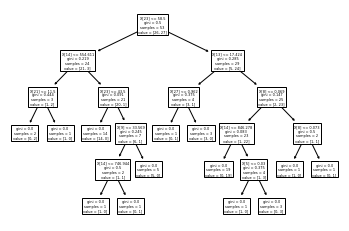

In [30]:
tree.plot_tree(clf)

# Random forest

Regina 29/05/23: Volvi a correr todo y resulto que random forest tiene un score de 0.875, por lo cual lo cambiaremos a este.

In [39]:
from sklearn.ensemble import RandomForestClassifier as RF

model_rf = RF(random_state = 1)
model_rf = model_rf.fit(x,y)

In [40]:
model_predict = model_rf.predict(test.drop(columns = ["arrythmia"]))
print(model_predict)
model_rf.score(test.drop(columns = ["arrythmia"]), test["arrythmia"])

[0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1]


0.875

# Nunca es suficiente... K nearest neighbors 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [34]:
prediction_neigh = neigh.predict(test.drop(columns = ["arrythmia"]))
neigh.score(test.drop(columns = ["arrythmia"]), test["arrythmia"])

0.7083333333333334

# Intentemos redes neuronales

In [ ]:
# from sklearn.neural_network import MLPClassifier
# neuron = clf = MLPClassifier(solver='lbfgs')

In [ ]:
# neuron.fit(x,y)

In [ ]:
# prediction_neuron = neuron.predict(test.drop(columns = ["arrythmia"]))
# neuron.score(test.drop(columns = ["arrythmia"]), test["arrythmia"])

In [35]:
# unsupervised
from sklearn.cluster import KMeans

clust = KMeans(n_clusters = 2).fit(x)


In [36]:
clust.predict(test.drop(columns = ["arrythmia"]))

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0])

In [37]:
test.arrythmia

6     1
40    1
12    1
0     1
51    0
55    0
82    0
63    0
59    0
33    1
84    0
94    0
20    1
14    1
70    0
38    1
11    1
7     1
39    1
25    1
35    1
45    1
44    1
18    1
Name: arrythmia, dtype: int64

In [38]:
clust.score(test.drop(columns = ["arrythmia"]), test["arrythmia"])

-5034965.065047305

# Pruebillas extras

In [ ]:
# data_ml[data_ml["arrythmia"] == 0].boxplot(figsize=[100,50], fontsize = 30)

In [ ]:
# data_ml.hist(figsize = [70,70])

Guardando los datos:

In [42]:
import joblib

filename = 'modelo_random_forest.joblib'
joblib.dump(model_rf,filename)

filename = 'modelo_decision_tree.joblib'
joblib.dump(tree,filename)

TypeError: cannot pickle 'module' object